<a href="https://colab.research.google.com/github/Sushant-S-13/CurrencyDetection/blob/main/Animal_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
# Explicitly import tensorflow.keras instead of just keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_gen=ImageDataGenerator(rescale=1./255)
train_data=train_gen.flow_from_directory('/content/Pet_Facial_Expression_Recognition/afhq/train',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)
test_gen=ImageDataGenerator(rescale=1./255)
test_data=test_gen.flow_from_directory('/content/Pet_Facial_Expression_Recognition/afhq/val',target_size=(128,128),batch_size=1,class_mode='categorical',shuffle=False)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [8]:
# Create a Sequential model
classifier_model = Sequential()

# Convolutional layers
classifier_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), name="line"))
classifier_model.add(MaxPooling2D((2, 2)))
classifier_model.add(Conv2D(64, (3, 3), activation='relu', name="segment"))
classifier_model.add(MaxPooling2D((2, 2)))
classifier_model.add(Conv2D(128, (3, 3), activation='relu', name="region"))
classifier_model.add(MaxPooling2D((2, 2)))
classifier_model.add(Conv2D(256, (3, 3), activation='relu', name="surface"))
classifier_model.add(MaxPooling2D((2, 2)))
classifier_model.add(Conv2D(512, (3, 3), activation='relu', name="contour"))
classifier_model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
classifier_model.add(Flatten())

# Fully connected layers
classifier_model.add(Dense(128, activation='relu', name="face"))
classifier_model.add(Dropout(0.5))  # Dropout for regularization
classifier_model.add(Dense(3, activation='softmax', name="species"))  # Adjust the output size based on the number of classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
classifier_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ line (Conv2D)                        │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ segment (Conv2D)                     │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ region (Conv2D)                      │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ surface (Conv2D)                     │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ contour (Conv2D)                     │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ face (Dense)                         │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ species (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,831,235 (6.99 MB)

 Trainable params: 1,831,235 (6.99 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
classifier_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = classifier_model.fit(train_data,epochs=10,batch_size = 64)

Epoch 1/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9312 - loss: 0.1953
Epoch 2/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9688 - loss: 0.0924
Epoch 3/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - accuracy: 0.9799 - loss: 0.0591
Epoch 4/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9821 - loss: 0.0511
Epoch 5/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.9844 - loss: 0.0427
Epoch 6/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9914 - loss: 0.0236
Epoch 7/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.9888 - loss: 0.0309
Epoch 8/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.9938 - loss: 0.0182
Epoch 9/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9916 - loss: 0.0247
Epoch 10/10
458/458 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9940 - loss: 0.0180


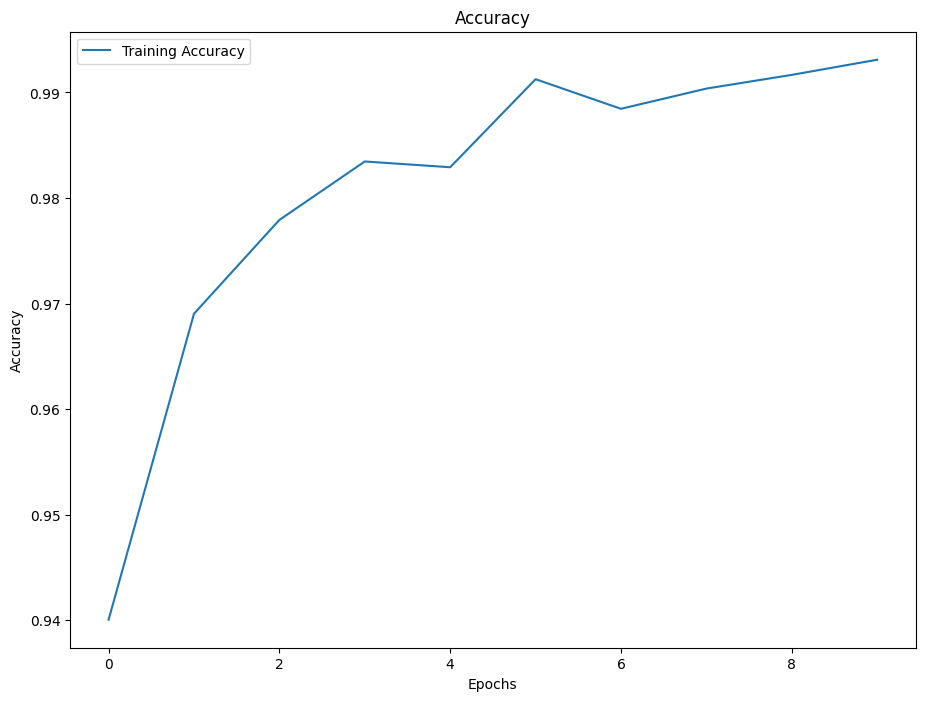

In [15]:
# Step 3: Visualizing Training and Validation Accuracy/Loss
epochs_range = range(10)
plt.figure(figsize=(24, 8))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [16]:
pred=classifier_model.predict(test_data).argmax(axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [17]:
from sklearn.metrics import classification_report
print(classification_report(pred ,test_data.classes ))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       501
           1       0.96      0.98      0.97       488
           2       0.98      0.96      0.97       511

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [20]:
classifier_model.save('Animal_Classifier.keras')